In [ ]:
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import re
import os
import wave
import glob
import librosa
import numpy as np
import pandas as pd
import librosa.display
from pydub import AudioSegment
import matplotlib.pyplot as plt
from IPython.display import Audio, display
from google.colab import drive
drive.mount('/content/drive')


ModuleNotFoundError: ignored

In [ ]:
PATH = "/content/drive/MyDrive/Colab Notebooks/Crema"
AUDIO_PATH = "/content/drive/MyDrive/Colab Notebooks/Crema/1001_DFA_ANG_XX.wav"

In [ ]:
## Extract audio features from Time Domain
def ZCRandRMS_TimeDomain(audio_file, frame_size=2048, hop_size=512):
    audio, sr = librosa.load(audio_file)
    # Calculate the number of frames
    n_frames = 1 + int((len(audio) - frame_size) / hop_size)
    zcr = np.zeros(n_frames)
    energy = np.zeros(n_frames)
    # Compute zero crossing rate and energy for each frame
    for i in range(n_frames):
        start = i * hop_size
        end = start + frame_size
        frame = audio[start:end]
        zcr[i] = np.sum(np.abs(np.diff(np.sign(frame)))) / (2 * len(frame))
        energy[i] = np.sqrt(np.mean(frame**2))
    feature = np.hstack([zcr, energy])
    return feature


In [ ]:
## Extract audio features from Frequency Domain
def ZCRandRMS_FreqDomain(audio_file):
    # Load the audio signal
    audio, sr = librosa.load(audio_file)
    # Compute the STFT and its magnitude
    stft = librosa.stft(audio)
    stft_mag = np.abs(stft)
    # Compute the zero crossing rate of the signal from the STFT
    stft_sign = np.sign(stft)
    stft_zcr = np.sum(np.abs(np.diff(stft_sign, axis=-1)), axis=-1) / 2
    # Compute the RMS energy of the signal from the STFT
    stft_rms = np.sqrt(np.mean(stft_mag**2, axis=0))
    feature = np.hstack([stft_zcr, stft_rms])
    return feature


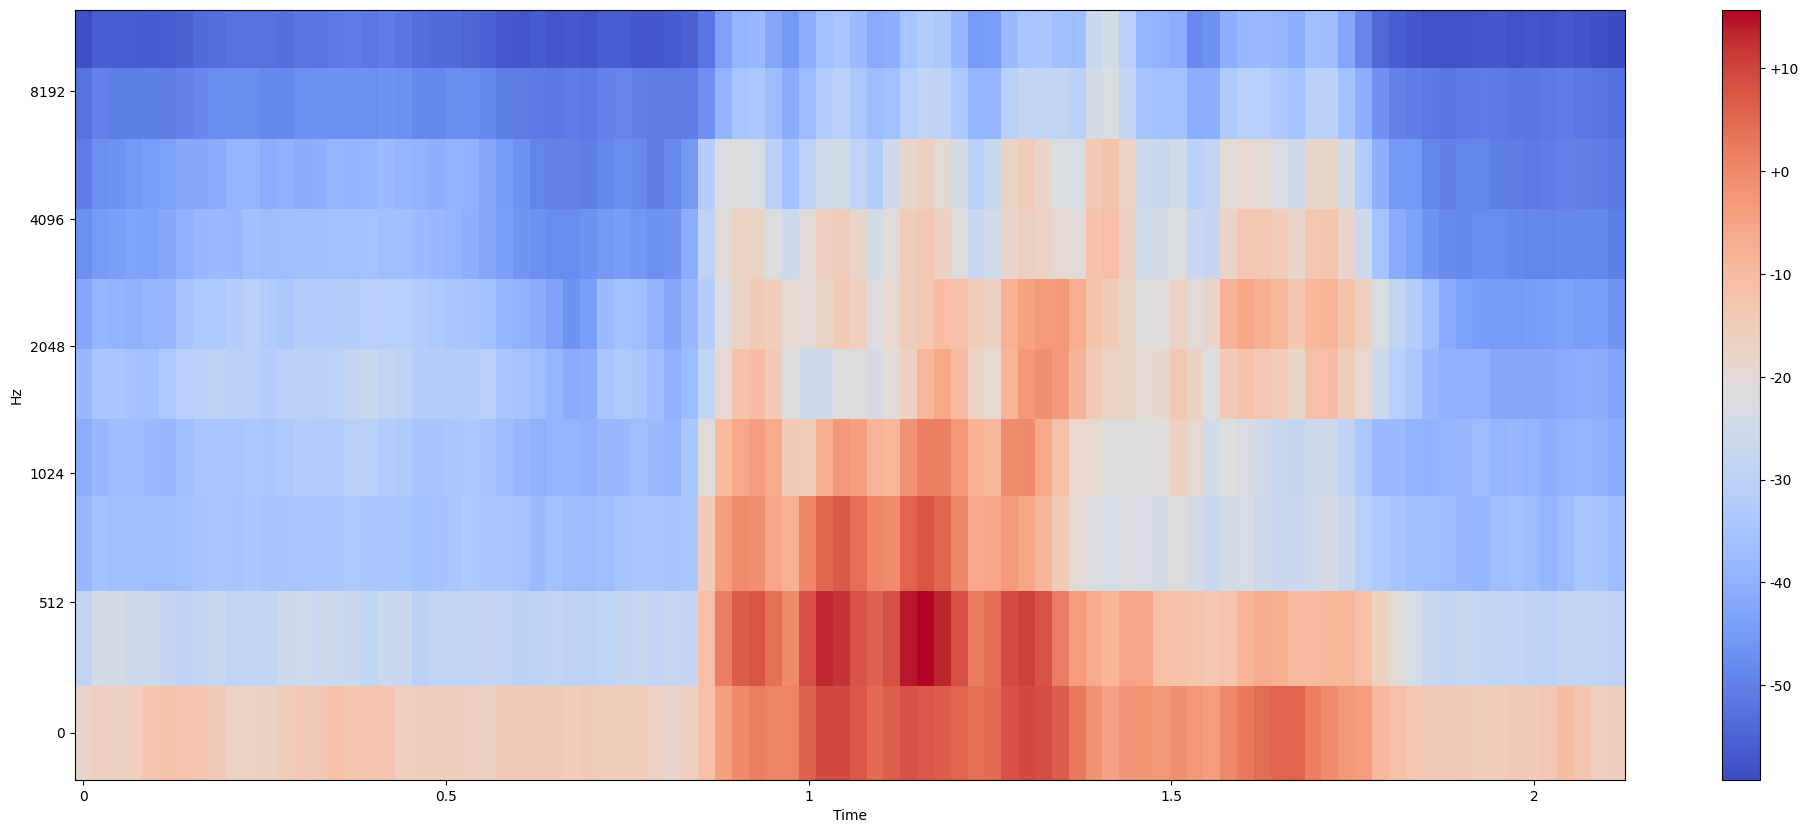

In [ ]:
audio, sr = librosa.load( "/content/drive/MyDrive/Colab Notebooks/Crema/1001_IOM_ANG_XX.wav")
mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=2048, hop_length=512, n_mels=10)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
log_mel_spectrogram.shape
plt.figure(figsize=(25, 10))
librosa.display.specshow(log_mel_spectrogram, 
                         x_axis="time",
                         y_axis="mel", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

In [ ]:
def playAudio(audio_file):
  audio = AudioSegment.from_wav(audio_file)
  # Play the audio
  audio.export('temp_audio.wav', format='wav')
  audio_data = open('temp_audio.wav', 'rb').read()
  display(Audio(audio_data))
  # Delete the temporary audio file
  os.remove('temp_audio.wav')

In [ ]:
def plotWaveform(audio_file, title):
  # Plot the waveform
  audio = AudioSegment.from_wav(audio_file)
  samples = audio.get_array_of_samples()
  sample_rate = audio.frame_rate
  duration = len(samples) / sample_rate
  time = [t / sample_rate for t in range(len(samples))]
  plt.plot(time, samples)
  plt.xlabel('Time (s)')
  plt.ylabel('Amplitude')
  plt.title(title)
  plt.show()

In [ ]:
def loadAndListenToAudio(dataset_path, class_name):
  D, Y = [], []
  features = np.array([])
  # defining the regular expression
  audio_files = glob.glob(os.path.join(dataset_path, f"*{class_name}*.wav"))
  print(class_name)
  # play the audio
  playAudio(audio_files[0])
  # plot the spectrum
  plotWaveform(audio_files[0], class_name)
  features = np.array([])
  for audio_file in audio_files: 
    feature = ZCRandRMS_FreqDomain(audio_file)
    if features.size == 0:
        features = feature
    else:
        # Append the new row to the Numpy array
        features = np.append(features, feature, axis=0)
    D.append(audio_file)
    Y.append(class_name)
  return D, Y

In [ ]:
def loadData(PATH):
  D, Y = [], []
  classes = ["SAD", "ANG", "DIS", "FEA", "HAP", "NEU"]
  for cls in classes: 
    d, y = loadAndListenToAudio(PATH, cls)
    D = np.concatenate((D, d))
    Y = np.concatenate((Y, y))
  return D, Y

SAD


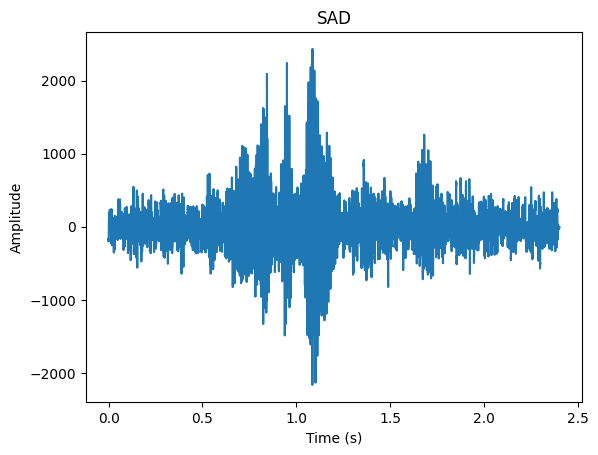

ANG


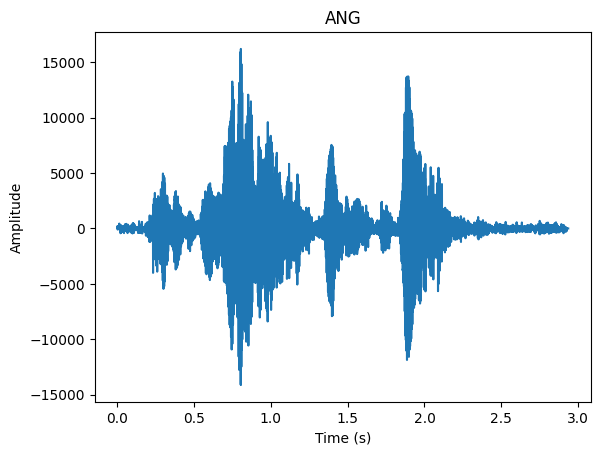

DIS


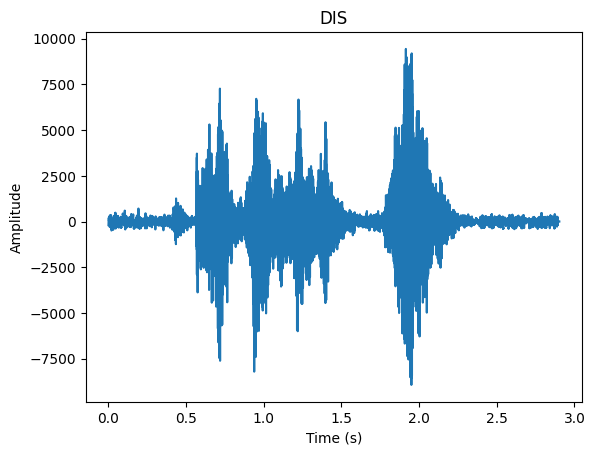

FEA


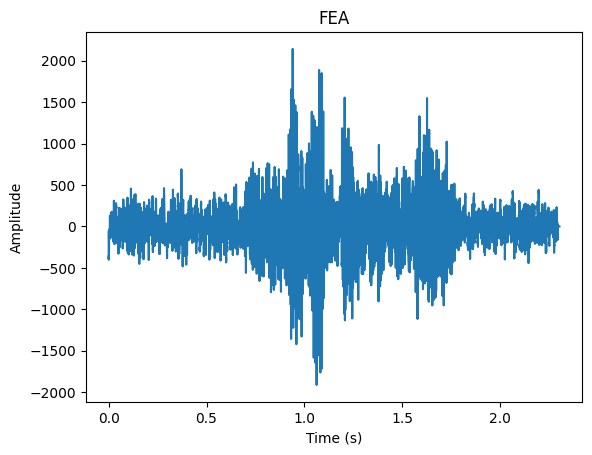

In [ ]:
D, Y = loadData(PATH)

In [ ]:
def visualize_waveform(audio, sr):
    plt.figure(figsize=(12, 4))
    plt.plot(audio)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Waveform')
    plt.show()

In [ ]:
def loadAndListenToAudiolib(dataset_path, class_name):
  D, Y = [], []
  # defining the regular expression
  audio_files = glob.glob(os.path.join(dataset_path, f"*{class_name}*.wav"))
  print(class_name)
  # play the audio
  playAudio(audio_files[0])
  # plot the spectrum
  audio, sr = librosa.load(audio_files[0])
  visualize_waveform(audio, sr)
  # plotWaveform(audio_files[0], class_name)
  for audio_file in audio_files: 
    D.append(audio_file)
    Y.append(class_name)
  return D, Y

In [ ]:
def loadDatalib(PATH):
  D, Y = [], []
  classes = ["SAD", "ANG", "DIS", "FEA", "HAP", "NEU"]
  for cls in classes: 
    d, y = loadAndListenToAudiolib(PATH, cls)
    D = np.concatenate((D, d))
    Y = np.concatenate((Y, y))
  return D, Y

In [ ]:
loadDatalib(PATH)